**MACHINE LEARNING LAB MANUAL - BY VEDANT PATEL (19BCP138)**

# Assignment 1: Python Practice

###**Q1.** Write a function that converts a decimal number to binary number.

In [ ]:
def func(n):
  if n>1:
    func(n//2)
  print(n%2,end = '')
func(36)

100100

###**Q2.** Write a function to compute the sigmoid of a vector of values. <br>
A sigmoid of a real number $x$ is defind as $\sigma(x)$ = $\frac{1}{1+e^-x}$ <br>
For example:
Input: $[x_{1}, x_{2}, x_{3}, x_{4}]$ <br>
Output: $[\sigma{(x_{1})}, \sigma{(x_{2})}, \sigma{(x_{3})}, \sigma{(x_{4})}]$

In [ ]:
import math
def func(n):
  y=1
  e=2.71828
  # for i in range(n):
  y= 1/(e**n)
  y=y+1
  y=1/y
  return y
l = list(map(int,input("Enter values: ").split()))
ans = []
for i in l:
  ans.append(func(i))
print(ans)


Enter values: 5
[0.9933071267165111]


###**Q3.** Write a function to compute the derivative of the sigmoid function with respect to its input $x$. Here, the $x$ is a vector. <br>
The derivative of a sigmoid is defined as: $\sigma(x)(1 - \sigma(x))$
<br>
*TRY TO PROVE THIS IN YOUR COPY*

In [ ]:

def func(n):
  y=1
  e=2.71828
  # for i in range(n):
  y= 1/(e**n)
  y=y+1
  y=1/y
  dy = y*(1-y)
  return y,dy
l = list(map(int,input("Enter values: ").split()))
ans = []
for i in l:
  ans.append(func(i))
print(ans)


Enter values: 5
[(0.9933071267165111, 0.006648078730700048)]


###**Q4.** Write a function to normalize the rows of a matrix. After applying this function to an input matrix $x$ of size $m \times n$, each row of $x$ should be a vector of unit length.

In [ ]:
import numpy as np
def divide(array):
  return array/np.sqrt(np.sum(np.square(array)))

def normalizeMatrix(matrix):
  return np.apply_along_axis(func1d=divide,axis=1,arr=matrix)

print(normalizeMatrix(np.array([[1,2,3],[4,5,6]])))

[[0.26726124 0.53452248 0.80178373]
 [0.45584231 0.56980288 0.68376346]]


###**Q5.** Write a program which can map() and filter() to make a list whose elements are cube of even numbers in a list.

In [ ]:
# Your code here
a= np.array([1,2,3,4,5,6,7,8,9])
b=list(map(lambda a:(a,a**3), filter(lambda x:x%2==0,a)))
print(b)

[(2, 8), (4, 64), (6, 216), (8, 512)]


###**Q6.** consider the marks list of class students given two lists <br>
Students = ['student1','student2','student3','student4','student5','student6','student7','student8','student9','student10'] <br>
Marks = [45, 78, 12, 14, 48, 43, 45, 98, 35, 80] <br>
from the above two lists the Student[0] got Marks[0],  Student[1] got Marks[1] and so on <br><br>
your task is to print the name of students <br>
<strong>a. Who got top 5 ranks, in the descending order of marks</strong> <br>
<strong>b. Who got least 5 ranks, in the increasing order of marks</strong><br>
<strong>d. Who got marks between  &gt;25th percentile &lt;75th percentile, in the increasing order of marks</strong>

<pre>
Ex 1:
Students=['student1','student2','student3','student4','student5','student6','student7','student8','student9','student10']
Marks = [45, 78, 12, 14, 48, 43, 47, 98, 35, 80]
a.
student8  98
student10 80
student2  78
student5  48
student7  47
b.
student3 12
student4 14
student9 35
student6 43
student1 45
c.
student9 35
student6 43
student1 45
student7 47
student5 48
</pre>

In [ ]:
# your code here
students=np.array(['student1','student2','student3','student4','student5','student6','student7','student8','student9','student10'])
marks = np.array([45, 78, 12, 14, 48, 43, 47, 98, 35, 80])

def percentile(students,marks):
  n=marks.size
  per=(marks.argsort().argsort()+1)*100/(n)
  result = np.array(list(zip(students,marks,per)), dtype=[ ('name','U30'), ('marks' ,'int64'), ('percentile', 'float64')])
  result.sort(order='marks')
  return result

def top_5(students,marks):
  result = percentile(students,marks)
  return result[-1:-6:-1]

def least_5(students,marks):
  result = percentile(students,marks)
  return result[:5]

def between_25_to_75(students,marks):
  result = percentile(students,marks)
  return result[(result['percentile']>=25) & (result['percentile']<=75)]


print(top_5(students,marks))
print(least_5(students,marks))
print(between_25_to_75(students,marks))

[('student8', 98, 100.) ('student10', 80,  90.) ('student2', 78,  80.)
 ('student5', 48,  70.) ('student7', 47,  60.)]
[('student3', 12, 10.) ('student4', 14, 20.) ('student9', 35, 30.)
 ('student6', 43, 40.) ('student1', 45, 50.)]
[('student9', 35, 30.) ('student6', 43, 40.) ('student1', 45, 50.)
 ('student7', 47, 60.) ('student5', 48, 70.)]


###**Q7.** consider you have given n data points in the form of list of tuples like S=[(x1,y1),(x2,y2),(x3,y3),(x4,y4),(x5,y5),..,(xn,yn)] and a point P=(p,q) <br> your task is to find 5 closest points(based on cosine distance) in S from P
<brs (x,y) and (p,q) is defind as $cos^{-1}(\frac{(x\cdot p+y\cdot q)}{\sqrt(x^2+y^2)\cdot\sqrt(p^2+q^2)})$>cosine distance between two point
<pre>
Ex:

S= [(1,2),(3,4),(-1,1),(6,-7),(0, 6),(-5,-8),(-1,-1)(6,0),(1,-1)]
P= (3,-4)

Output:
(6,-7)
(1,-1)
(6,0)
(-5,-8)
(-1,-1)
</pre>

In [ ]:
import math

# write your python code here
# you can take the above example as sample input for your program to test
# it should work for any general input try not to hard code for only given input examples
# you can free to change all these codes/structure

#def closest_points_to_p(S, P):
    # write your code here
    # return closest_points_to_p  # its list of tuples



# here S is list of tuples and P is a tuple ot len=2
cosine_dist = []
S = [(1,2), (3,4), (-1,1), (6,-7), (0, 6), (-5,-8), (-1,-1), (6,0), (1,-1)]
P = (3,-4)

# To find out the inverse of cosine in Python we use math.acos() function of Python Standard math Library.
# The inverse of cosine is also called arc cosine.
for a, b in S:
    numerator = a * P[0] + b * P[1]
    denominator = math.sqrt(a ** 2 + b ** 2) * math.sqrt(P[0] ** 2 + P[1] **2)
    cosine_dist.append(math.acos(numerator / denominator))

X = cosine_dist
Y = [S for S in sorted(zip(S,X), key = lambda i: i[1])]
k = Y[:5]
for i, j in k:
    print(i)

(6, -7)
(1, -1)
(6, 0)
(-5, -8)
(-1, -1)


###**Q8:** Given two sentences S1, S2
You will be given a list of lists, each sublist will be of length 2 i.e. [[x,y],[p,q],[l,m]..[r,s]]
consider its like a matrix of n rows and two columns

a. the first column Y will contain interger values <br>
b. the second column $Y_{score}$ will be having float values <br>
Your task is to find the value of $f(Y,Y_{score}) = -1*\frac{1}{n}\Sigma_{for each Y,Y_{score} pair}(Ylog10(Y_{score})+(1-Y)log10(1-Y_{score}))$ here n is the number of rows in the matrix
<pre>
Ex:
[[1, 0.4], [0, 0.5], [0, 0.9], [0, 0.3], [0, 0.6], [1, 0.1], [1, 0.9], [1, 0.8]]
output:
0.4243099
</pre>
$\frac{-1}{8}\cdot((1\cdot log_{10}(0.4)+0\cdot log_{10}(0.6))+(0\cdot log_{10}(0.5)+1\cdot log_{10}(0.5)) + ... + (1\cdot log_{10}(0.8)+0\cdot log_{10}(0.2)) )$

In [ ]:
# your code here

def computeYYScore(s):
  n=s.shape[0]
  return (-1/n)*np.sum(np.array(list(map(lambda x : x[0]*np.log10(x[1])+(1-x[0])*np.log10(1-x[1]), s))))

s = np.array([[1, 0.4], [0, 0.5], [0, 0.9], [0, 0.3], [0, 0.6], [1, 0.1], [1, 0.9], [1, 0.8]])

computeYYScore(s)



0.42430993457031635

# Assignment 2: Exploratory data analysis


In [ ]:
import pandas as pd
df = pd.read_csv('haberman.csv')
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


###1.1 Analyze high level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.

- You have to write all of your observations in Markdown cell with proper formatting.
- Do not write your observations as comments in code cells.
- Draw pie chart of the class label

In [ ]:
#number of points and features
df.shape

(306, 4)

There are 306 data rows in this dataset.

In [ ]:
# number of classes
df["status"].unique().size

2

There are two features in this dataset.

In [ ]:
#data points per class
df["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

There are 255 data samples belonging to class 1 and 81 samples belonging to class 2. Thus we can say that the dataset is imbalanced.

### 1.2 - Explain the objective of the problem.
(The objective for a problem can be defined as a brief explanation of problem that you are trying to solve using the given dataset)

The objective of this assignment is to preform exploratory data on analysis Haberman Cancer Survival dataset obtained from Kaggle. The main aim is to preform univariate as well as bivariate analysis on the feature set to identify the best features which can used for training different classification models.

### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot.
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Do write observations/inference for each plot.

After plotting the scatter plot for all the three features, we can conclude that there is overlapping between both the class label. Thus none of the feature can be linearly separated.

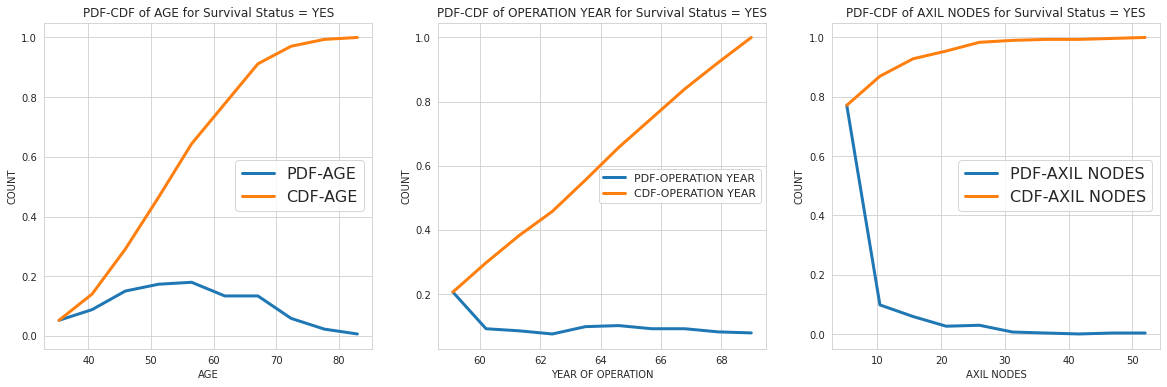

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,6))
plt.subplot(131) ##(1=no. of rows, 3= no. of columns, 1=1st figure,2,3,4 boxes)
counts,bin_edges=np.histogram(df["age"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.ylabel("COUNT")
plt.xlabel('AGE')
plt.title('PDF-CDF of AGE for Survival Status = YES')
plt.legend(['PDF-AGE', 'CDF-AGE'], loc = 5,prop={'size': 16})

plt.subplot(132)
counts,bin_edges=np.histogram(df["year"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.ylabel("COUNT")
plt.xlabel('YEAR OF OPERATION')
plt.title('PDF-CDF of OPERATION YEAR for Survival Status = YES')
plt.legend(['PDF-OPERATION YEAR', 'CDF-OPERATION YEAR'], loc = 5,prop={'size': 11})

plt.subplot(133)
counts,bin_edges=np.histogram(df["nodes"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.ylabel("COUNT")
plt.xlabel('AXIL NODES')
plt.title('PDF-CDF of AXIL NODES for Survival Status = YES')
plt.legend(['PDF-AXIL NODES', 'CDF-AXIL NODES'], loc = 5,prop={'size': 16})
plt.show()

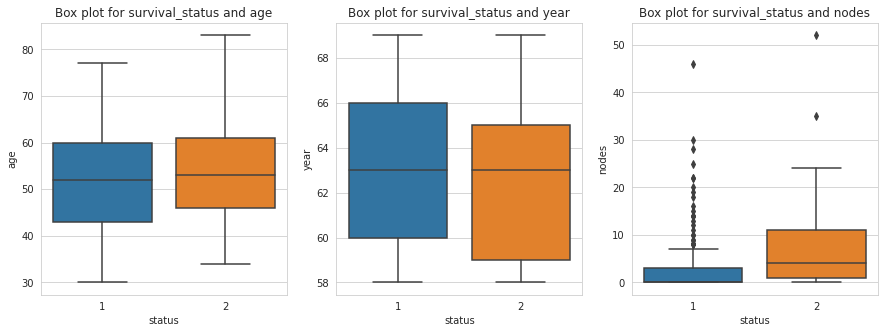

In [ ]:
import seaborn as sns
figure, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    mystr="Box plot for survival_status and "+feature
    sns.boxplot( x='status', y=feature, data=df, ax=axes[idx]).set_title(mystr)
plt.show()

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Do write observations/inference for each  plot.


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


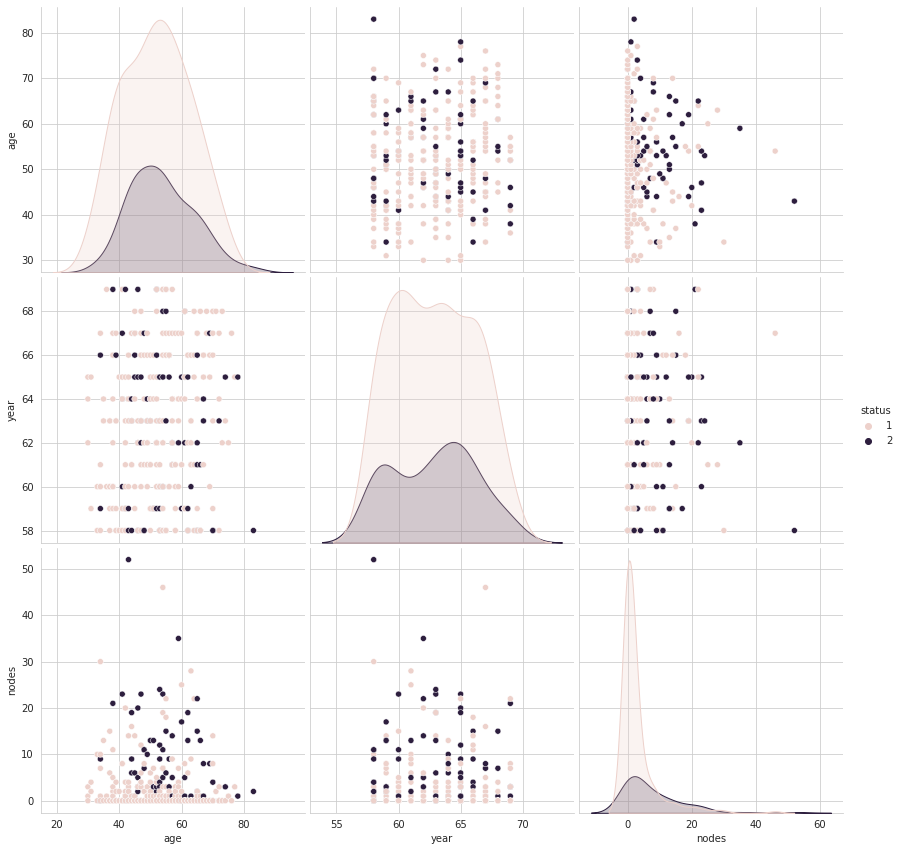

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="status", size=4);
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


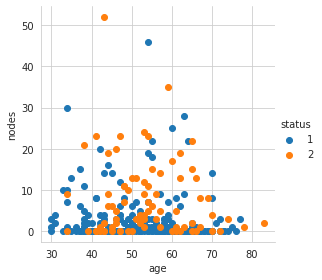

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", size=4 ) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


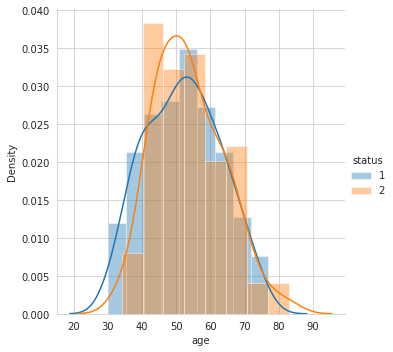

In [ ]:
sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


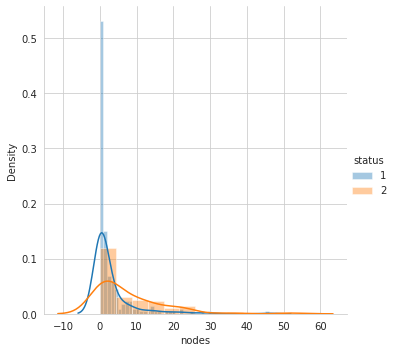

In [ ]:
sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


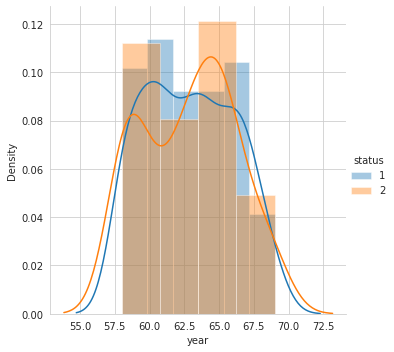

In [ ]:
sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points

 - After performing the EDA on the dataset, we can conclude that none of the features are more important than the others. Hence all of the features will be considered equal.

 - Exploratory Data Analysis:
  - There are 306 data points in the dataset.
  - There are 3 features in the dataset namely: Age,	Op_Year,	axil_nodes.
  - The output class is Surv_status which has two class labels 1 which depicts that patient survived 5 years or longer and 2 which depicts the patient died within 5 year.
  - There are 255 data samples belonging to class 1 and 81 samples belonging to class 2. Thus we can say that the dataset is imbalanced.
  - Pie chart of the class label shows that 74% of the patient survived 5 years or longer whereas 26% of the patient died within 5 year.
  - After plotting the scatter plot for all the three features, we can conclude that there is overlapping between both the class label. Thus none of the feature can be linearly separated.
  - After plotting the PDF (Probability Distribution Function) for all the three features, we can conclude that there is overlapping between both the class label.
  - As we can observe from the 2D scatter plot and pair plot, that none of the feature pairs are linearly separable. Thus, we cannot give preference to any feature pair.